In [0]:
# Criar:
#   coluna com aptidão  pré-definida  de cada aluno
#   coluna com nota 
 
# Condicional que leva em conta a nota para ofertar descontos

# 	1. Maior que 6, desconto vai até 50%

# Estratégia:
# O objetivo da instituição não é apenas adquirir alunos a curto prazo mas sim utilizar os com maior aptidão para melhorar a nota no MEC e atrair mais alunos futuramente.


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
companhia = spark.read.csv("/FileStore/tables/Companhia_MB.txt", header=True, sep='\t')
companhia = companhia.toPandas()



In [0]:
companhia.head()

,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia
0,1,solteiro,1-ensino fundamental,None,4,26,interior
1,2,casado,1-ensino fundamental,1,4.56,32,capital
2,3,casado,1-ensino fundamental,2,5.25,36,capital
3,4,solteiro,2-ensino medio,None,5.73,20,outra
4,5,solteiro,1-ensino fundamental,None,6.26,40,outra


In [0]:
# Criando coluna sexo 
arr = np.random.choice(['M','F'], size=36)
sexo = {'sexo':arr}

In [0]:
# Criando coluna aptidao
aptidao = ['Exatas','Biológicas', 'Humanas']
aptidao = np.random.choice(aptidao, size=36)
aptidao = {'aptidao':aptidao}
aptidao

Out[44]: {'aptidao': array(['Biológicas', 'Biológicas', 'Humanas', 'Exatas', 'Biológicas',
        'Exatas', 'Exatas', 'Exatas', 'Exatas', 'Humanas', 'Biológicas',
        'Biológicas', 'Exatas', 'Biológicas', 'Humanas', 'Exatas',
        'Humanas', 'Humanas', 'Exatas', 'Exatas', 'Biológicas', 'Exatas',
        'Humanas', 'Humanas', 'Exatas', 'Exatas', 'Humanas', 'Biológicas',
        'Exatas', 'Exatas', 'Humanas', 'Biológicas', 'Humanas', 'Exatas',
        'Humanas', 'Biológicas'], dtype='<U10')}

In [0]:
#Criando coluna notas
nota=[1.0,2.0 ,3.0, 4.0, 5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
nota = np.random.choice(nota, size=36)
nota = {'nota':nota}
nota


Out[45]: {'nota': array([ 5. ,  8. ,  8.5,  5. ,  5. ,  4. ,  9.5,  8.5,  9.5,  6.5,  6.5,
         4. ,  1. ,  7.5,  7.5,  6.5,  4. ,  5. ,  2. ,  7. ,  3. , 10. ,
        10. ,  5. ,  6.5,  7. ,  7.5,  9.5,  7. ,  3. ,  3. ,  6.5,  4. ,
         8.5,  9. ,  9. ])}

In [0]:
companhia['sexo'] = sexo['sexo']
companhia['aptidao'] = aptidao['aptidao']
companhia['nota'] = nota['nota']
companhia.head()  


,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia,sexo,aptidao,nota
0,1,solteiro,1-ensino fundamental,None,4,26,interior,F,Biológicas,5.0
1,2,casado,1-ensino fundamental,1,4.56,32,capital,M,Biológicas,8.0
2,3,casado,1-ensino fundamental,2,5.25,36,capital,F,Humanas,8.5
3,4,solteiro,2-ensino medio,None,5.73,20,outra,M,Exatas,5.0
4,5,solteiro,1-ensino fundamental,None,6.26,40,outra,F,Biológicas,5.0


In [0]:
#Criando coluna preco
#É necessário que a coluna aptidao seja criada para poder gerá-la

if 'Preco' in companhia:
    companhia.pop('Preco')
    
elif 'Preco' not in companhia:
    preco = []

    for area in companhia['aptidao']:
        if area == 'Humanas':
            preco.append(400)

        elif area == 'Exatas':
            preco.append(500)

        elif area == 'Biológicas':
            preco.append(750)

    companhia = companhia.assign(Preco=preco)
    
else:
    for area in companhia['aptidao']:
        if area == 'Humanas':
            preco.append(400)

        elif area == 'Exatas':
            preco.append(500)

        elif area == 'Biológicas':
            preco.append(750)

    companhia = companhia.assign(Preco=preco)


In [0]:
companhia.head(36)

,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia,sexo,aptidao,nota,Preco
0,1,solteiro,1-ensino fundamental,None,4,26,interior,F,Biológicas,5.0,750
1,2,casado,1-ensino fundamental,1,4.56,32,capital,M,Biológicas,8.0,750
2,3,casado,1-ensino fundamental,2,5.25,36,capital,F,Humanas,8.5,400
3,4,solteiro,2-ensino medio,None,5.73,20,outra,M,Exatas,5.0,500
4,5,solteiro,1-ensino fundamental,None,6.26,40,outra,F,Biológicas,5.0,750
5,6,casado,1-ensino fundamental,0,6.66,28,interior,M,Exatas,4.0,500
6,7,solteiro,1-ensino fundamental,None,6.86,41,interior,M,Exatas,9.5,500
7,8,solteiro,1-ensino fundamental,None,7.39,43,capital,F,Exatas,8.5,500
8,9,casado,2-ensino medio,1,7.59,34,capital,F,Exatas,9.5,500
9,10,solteiro,2-ensino medio,None,7.44,23,outra,M,Humanas,6.5,400


In [0]:
tamanho= companhia.shape
print(f'Linhas e colunas: {tamanho} \n')
tab_grau_instrucao = companhia['aptidao'].value_counts()
display(tab_grau_instrucao)

Linhas e colunas: (36, 11) 

Exatas        15
Humanas       11
Biológicas    10
Name: aptidao, dtype: int64

In [0]:
companhia['aptidao'].value_counts()

Out[52]: Exatas        15
Humanas       11
Biológicas    10
Name: aptidao, dtype: int64

In [0]:
companhia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N                36 non-null     object 
 1   estado_civil     36 non-null     object 
 2   grau_instrucao   36 non-null     object 
 3   n_filhos         20 non-null     object 
 4   salario          36 non-null     object 
 5   idade_anos       36 non-null     object 
 6   reg_procedencia  36 non-null     object 
 7   sexo             36 non-null     object 
 8   aptidao          36 non-null     object 
 9   nota             36 non-null     float64
 10  Preco            36 non-null     int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 3.2+ KB


In [0]:
Exatas = ['Tecnico em Finanças', 'Administração', 'Tecnologia da informação']

Humanas = ['Publicidade', 'Teatro', 'Recursos Humanos']

Biologicas = ['Estética', 'Ambiente e saúde' , 'Enfermagem']


vocacao = pd.DataFrame({'Exatas':Exatas, 'Humanas':Humanas, 'Biologicas':Biologicas})
# Universidade = Universidade.transpose()
vocacao.head()

,Exatas,Humanas,Biologicas
0,Tecnico em Finanças,Publicidade,Estética
1,Administração,Teatro,Ambiente e saúde
2,Tecnologia da informação,Recursos Humanos,Enfermagem


In [0]:
vocacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Exatas      3 non-null      object
 1   Humanas     3 non-null      object
 2   Biologicas  3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [0]:
desconto = []
for nota in companhia['nota']:
    
    if nota >= 6 and nota <7:
        desconto.append(0.10)
        
    elif nota >= 7 and nota <8:
        desconto.append(0.20)
        
    elif nota >= 8 and nota <9:
        desconto.append(0.30)
        
    elif nota >= 9 and nota <10:
        desconto.append(0.40)
        
    elif nota == 10:
        desconto.append(0.50)
        
    else:
        desconto.append(0.05)
   

vocacao_desconto = pd.DataFrame({ 'Aptidao':companhia['aptidao'], 'Nota':companhia['nota'],'Desconto':desconto})
# Universidade = Universidade.transpose()
vocacao_desconto.head(36)
               
                                                        

,Aptidao,Nota,Desconto
0,Biológicas,5,0.05
1,Biológicas,8,0.30
2,Humanas,8,0.30
3,Exatas,5,0.05
4,Biológicas,5,0.05
5,Exatas,4,0.05
6,Exatas,9,0.40
7,Exatas,8,0.30
8,Exatas,9,0.40
9,Humanas,6,0.10


In [0]:
type(companhia)

Out[256]: pandas.core.frame.DataFrame

In [0]:
desconto = []
for nota in companhia['nota']:
    if nota < 6:
        desconto.append(0.05)
        
    if nota >= 6 and nota <7:
        desconto.append(0.10)

 

    elif nota >= 7 and nota <8:
        desconto.append(0.20)

 

    elif nota >= 8 and nota <9:
        desconto.append(0.30)

 

    elif nota >= 9 and nota <10:
        desconto.append(0.40)

 

    else:
        desconto.append(0.50)
            
print(desconto)
print(companhia['nota'])
companhia['nota'] = companhia['nota'].astype(int)

[0.05, 0.5, 0.3, 0.3, 0.05, 0.5, 0.05, 0.5, 0.05, 0.5, 0.4, 0.3, 0.4, 0.1, 0.1, 0.05, 0.5, 0.05, 0.5, 0.2, 0.2, 0.1, 0.05, 0.5, 0.05, 0.5, 0.05, 0.5, 0.2, 0.05, 0.5, 0.5, 0.5, 0.05, 0.5, 0.1, 0.2, 0.2, 0.4, 0.2, 0.05, 0.5, 0.05, 0.5, 0.1, 0.05, 0.5, 0.3, 0.4, 0.4]
0      5.0
1      8.0
2      8.5
3      5.0
4      5.0
5      4.0
6      9.5
7      8.5
8      9.5
9      6.5
10     6.5
11     4.0
12     1.0
13     7.5
14     7.5
15     6.5
16     4.0
17     5.0
18     2.0
19     7.0
20     3.0
21    10.0
22    10.0
23     5.0
24     6.5
25     7.0
26     7.5
27     9.5
28     7.0
29     3.0
30     3.0
31     6.5
32     4.0
33     8.5
34     9.0
35     9.0
Name: nota, dtype: float64


In [0]:
for index, row in companhia.iterrows():
    if row['aptidao'] == 'Exatas':
        print(f"Essas são as opções de cursos para você: \n {vocacao['Exatas']}\n")
        mensalidade = 500
        mensalidade_com_desconto = mensalidade * (1 - desconto[index])       
        print(tab_desconto)
        print(f"Sua mensalidade com desconto é de R${mensalidade_com_desconto:.2f} por mês.\n")
        
    elif row['aptidao'] == 'Biológicas':
        print(f"Essas são as opções de cursos para você: \n {vocacao['Biologicas']}\n")
        mensalidade = 750
        mensalidade_com_desconto = mensalidade * (1 - desconto[index])
        print(f"Sua mensalidade com desconto é de R${mensalidade_com_desconto:.2f} por mês.\n")
        
    elif row['aptidao'] == 'Humanas':
        print(f"Essas são as opções de cursos para você: \n {vocacao['Humanas']}\n")
        mensalidade = 400
        mensalidade_com_desconto = mensalidade * (1 - desconto[index])
        print(f"Sua mensalidade com desconto é de R${mensalidade_com_desconto:.2f} por mês.\n")

Essas são as opções de cursos para você: 
 0            Estética
1    Ambiente e saúde
2          Enfermagem
Name: Biologicas, dtype: object

Sua mensalidade com desconto é de R$712.50 por mês.

Essas são as opções de cursos para você: 
 0            Estética
1    Ambiente e saúde
2          Enfermagem
Name: Biologicas, dtype: object

Sua mensalidade com desconto é de R$525.00 por mês.

Essas são as opções de cursos para você: 
 0         Publicidade
1              Teatro
2    Recursos Humanos
Name: Humanas, dtype: object

Sua mensalidade com desconto é de R$280.00 por mês.

Essas são as opções de cursos para você: 
 0         Tecnico em Finanças
1               Administração
2    Tecnologia da informação
Name: Exatas, dtype: object

                     Cursos  Nota  Mensalidade  Desconto
0       Tecnico em Finanças     9          500     350.0
1             Administração     9          500     350.0
2  Tecnologia da informação     9          500     350.0
Sua mensalidade com desconto

In [0]:

# for aptidao in companhia['aptidao']:
#     print(aptidao)
# #     for nota in companhia['nota']:
# #     if companhia['aptidao'][aptidao] == 'Humanas':
# #         print(f"Essas são as opções de cursos para você: \n {Universidade['Humanas']}\n")
# #         print(f"Sua nota é: {companhia['nota'][aptidao]}\n")
for i in range(len(companhia)):
    if companhia['aptidao'][i] == 'Humanas':
        print(f"Essas são as opções de cursos para você: \n{Universidade['Humanas']}\n")
        print(f"Sua nota é: {companhia['nota'][i]}\n")

#                 if nota >= 6 and nota <7:
#                     desconto = 0.10
#                 elif nota >= 7 and nota <8:
#                     desconto = 0.20
#                 elif nota >= 8 and nota <9:
#                     desconto = 0.30
#                 elif nota >= 9 and nota <10:
#                     desconto = 0.40
#                 else:
#                     desconto = 0.50
#                 print(f'\n O desconto é: {desconto}')
#                 mensalidade = preco  
#                 mensalidade_com_desconto = mensalidade * (1 - desconto)
#                 print(f"Sua mensalidade com desconto é de R${mensalidade_com_desconto:.2f} por mês.\n")


Essas são as opções de cursos para você: 
0         Publicidade
1              Teatro
2    Recursos Humanos
Name: Humanas, dtype: object

Sua nota é: 8

Essas são as opções de cursos para você: 
0         Publicidade
1              Teatro
2    Recursos Humanos
Name: Humanas, dtype: object

Sua nota é: 6

Essas são as opções de cursos para você: 
0         Publicidade
1              Teatro
2    Recursos Humanos
Name: Humanas, dtype: object

Sua nota é: 7

Essas são as opções de cursos para você: 
0         Publicidade
1              Teatro
2    Recursos Humanos
Name: Humanas, dtype: object

Sua nota é: 4

Essas são as opções de cursos para você: 
0         Publicidade
1              Teatro
2    Recursos Humanos
Name: Humanas, dtype: object

Sua nota é: 5

Essas são as opções de cursos para você: 
0         Publicidade
1              Teatro
2    Recursos Humanos
Name: Humanas, dtype: object

Sua nota é: 10

Essas são as opções de cursos para você: 
0         Publicidade
1              Te

In [0]:
#Renomeando Index
vocacao.rename(columns={0: " 1" , 1 : 2, 2 : 3 }, inplace=True)
vocacao.head()

,,,
Exatas,Fisica,Matematica,Ciências economicas
Humanas,Marketing,Jornalismo,Psicologia
Biologicas,Biomedicina,Nutrição,Educação fisica


In [0]:
companhia.sort_values('nota', ascending=False).head(36)

,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia,sexo,aptidao,nota,Preco
22,23,solteiro,1-ensino fundamental,None,12,41,outra,M,Humanas,10,400
21,22,solteiro,2-ensino medio,None,11.59,34,capital,M,Exatas,10,500
6,7,solteiro,1-ensino fundamental,None,6.86,41,interior,M,Exatas,9,500
27,28,casado,2-ensino medio,0,14.69,29,interior,F,Biológicas,9,750
8,9,casado,2-ensino medio,1,7.59,34,capital,F,Exatas,9,500
35,36,casado,3-superior,3,23.3,42,interior,M,Biológicas,9,750
34,35,casado,2-ensino medio,2,19.4,48,capital,M,Humanas,9,400
33,34,solteiro,3-superior,None,18.75,33,capital,M,Exatas,8,500
2,3,casado,1-ensino fundamental,2,5.25,36,capital,F,Humanas,8,400
1,2,casado,1-ensino fundamental,1,4.56,32,capital,M,Biológicas,8,750


In [0]:
companhia.agg({'nota': ['min', 'max', 'mean']})

,nota
min,1.000000
max,10.000000
mean,6.166667


In [0]:
analise_notas = companhia['nota']
analise_notas.head()

Out[89]: 0    5
1    8
2    8
3    5
4    5
Name: nota, dtype: int64

In [0]:
companhia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   N                36 non-null     object
 1   estado_civil     36 non-null     object
 2   grau_instrucao   36 non-null     object
 3   n_filhos         20 non-null     object
 4   salario          36 non-null     object
 5   idade_anos       36 non-null     object
 6   reg_procedencia  36 non-null     object
 7   sexo             36 non-null     object
 8   aptidao          36 non-null     object
 9   nota             36 non-null     int64 
 10  Preco            36 non-null     int64 
dtypes: int64(2), object(9)
memory usage: 3.2+ KB


In [0]:
companhia['N'] = companhia['N'].astype(int)
companhia['idade_anos'] = companhia['idade_anos'].astype(int)

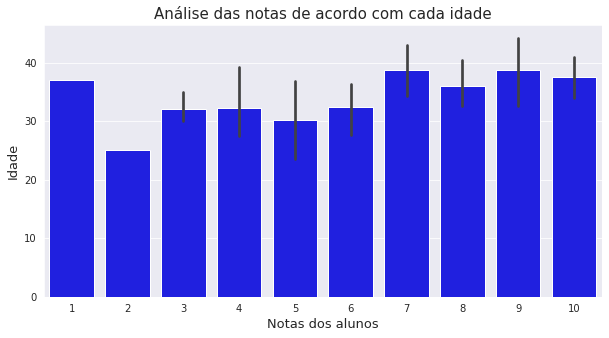

In [0]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=companhia, x='nota', y='idade_anos', ax=ax, color='blue');
ax.set_ylabel('Idade', fontsize=13);
ax.set_xlabel('Notas dos alunos', fontsize=13);
ax.set_title('Análise das notas de acordo com cada idade', fontsize=15);

In [0]:
companhia.query('nota == 10')


,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia,sexo,aptidao,nota,Preco
21,22,solteiro,2-ensino medio,None,11.59,34,capital,M,Exatas,10,500
22,23,solteiro,1-ensino fundamental,None,12,41,outra,M,Humanas,10,400


In [0]:
grau_nota = companhia[['grau_instrucao', 'nota']]
grau_nota.sort_values('grau_instrucao', ascending=True)

,grau_instrucao,nota
0,1-ensino fundamental,5
26,1-ensino fundamental,7
22,1-ensino fundamental,10
13,1-ensino fundamental,7
11,1-ensino fundamental,4
7,1-ensino fundamental,8
17,1-ensino fundamental,5
5,1-ensino fundamental,4
4,1-ensino fundamental,5
1,1-ensino fundamental,8


In [0]:
companhia['reg_procedencia'].value_counts()

Out[97]: outra       13
interior    12
capital     11
Name: reg_procedencia, dtype: int64

In [0]:
companhia['aptidao'].value_counts()

Out[98]: Exatas        15
Humanas       11
Biológicas    10
Name: aptidao, dtype: int64

In [0]:
pd.crosstab(companhia['reg_procedencia'], companhia['aptidao'], normalize='index')

aptidao,Biológicas,Exatas,Humanas
reg_procedencia,,,
capital,0.181818,0.454545,0.363636
interior,0.416667,0.500000,0.083333
outra,0.230769,0.307692,0.461538


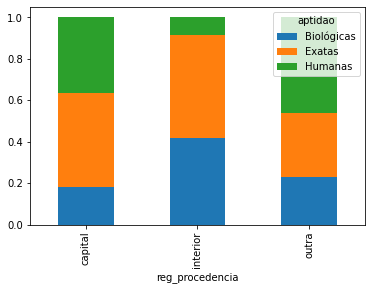

In [0]:
tab_perc = pd.crosstab(companhia['reg_procedencia'], companhia['aptidao'], normalize='index')
tab_perc.plot(kind='bar', stacked=True);

In [0]:
companhia['nota'].value_counts()

Out[104]: 7     6
5     5
9     5
6     5
8     4
4     4
3     3
10    2
1     1
2     1
Name: nota, dtype: int64

In [0]:
companhia['nota'].describe()

Out[105]: count    36.000000
mean      6.166667
std       2.311462
min       1.000000
25%       4.750000
50%       6.000000
75%       8.000000
max      10.000000
Name: nota, dtype: float64

In [0]:
pd.crosstab(companhia['grau_instrucao'], companhia['nota'])

nota,1,2,3,4,5,6,7,8,9,10
grau_instrucao,,,,,,,,,,
1-ensino fundamental,0,0,0,2,3,0,2,3,1,1
2-ensino medio,1,0,2,1,1,5,4,0,3,1
3-superior,0,1,1,1,1,0,0,1,1,0


In [0]:
pd.crosstab(companhia['grau_instrucao'], companhia['nota'], normalize='index')

nota,1,2,3,4,5,6,7,8,9,10
grau_instrucao,,,,,,,,,,
1-ensino fundamental,0.000000,0.000000,0.000000,0.166667,0.250000,0.000000,0.166667,0.250000,0.083333,0.083333
2-ensino medio,0.055556,0.000000,0.111111,0.055556,0.055556,0.277778,0.222222,0.000000,0.166667,0.055556
3-superior,0.000000,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000


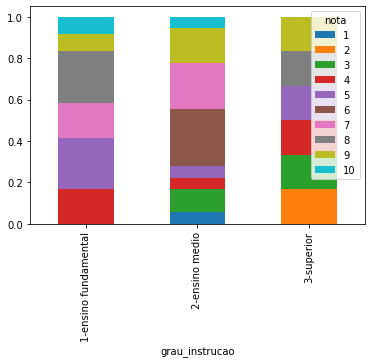

In [0]:
tab_perc = pd.crosstab(companhia['grau_instrucao'], companhia['nota'], normalize='index')
tab_perc.plot(kind='bar', stacked=True);